In [14]:
import numpy as np

'''
imp1=np.load('prepro_data/Tim_novice_imp_marks.npy')
vis1=np.load('prepro_data/Tim_novice_vis_marks.npy')
imp2=np.load('prepro_data/Annika_novice_imp_marks.npy')
vis2=np.load('prepro_data/Annika_novice_vis_marks.npy')
imp3=np.load('prepro_data/Sofia_novice_imp_marks.npy')
vis3=np.load('prepro_data/Sofia_novice_vis_marks.npy')
imp4=np.load('prepro_data/Konstantin_novice_imp_marks.npy')
vis4=np.load('prepro_data/Konstantin_novice_vis_marks.npy')
imp5=np.load('prepro_data/Jojo_novice_imp_marks.npy')
vis5=np.load('prepro_data/Jojo_novice_vis_marks.npy')
'''

a = np.load('prepro_data/t_low_mark_aug.npy')
b = np.load('prepro_data/t_mid_mark_aug.npy')
c = np.load('prepro_data/t_high_mark_aug.npy')

#g_r = np.concatenate((imp1, vis1, imp2, vis2, imp3, vis3, imp4, vis4, imp5, vis5), axis=0)
#b_r = np.concatenate((b_imp, b_vis), axis=0)
#b_r = np.concatenate((a,b), axis=0)
b_r = np.concatenate((a, b, c), axis=0)


#np.save('prepro_data/novice-Thomas.npy', g_r)
#np.save('prepro_data/bad.npy', b_r)
np.save('prepro_data/t_mark.npy', b_r)



In [11]:
ar = np.load('prepro_data/novice_mark-Thomas.npy')
print(len(ar))

KeyboardInterrupt: 

In [1]:
import datetime
import tensorflow as tf
from vit_keras import vit
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import layers,Model,losses,regularizers,models
import numpy as np
import imutils
import cv2
import json


# import the necessary packages
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import Model

print(tf.__version__)
# Explicitly specify GPU device
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

print(physical_devices[0])


2.10.0
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [2]:
def load_training_3(array1,array2,array3):
    load_r_i=np.load(array1)
    array_r_i=load_r_i.astype(np.float16) 
    load_m_i=np.load(array2)
    array_m_i=load_m_i.astype(np.float16) 
    load_t_i=np.load(array3)
    array_t_i=load_t_i.astype(np.float16) 

    del load_r_i, load_m_i, load_t_i


    np.random.shuffle(array_r_i)
    np.random.shuffle(array_m_i)
    np.random.shuffle(array_t_i)
    length = min(len(array_r_i),len(array_m_i),len(array_t_i))

    array_r_i = array_r_i[:length]
    array_m_i = array_m_i[:length]
    array_t_i = array_t_i[:length]

    array_t_t = np.zeros((length,3))
    array_t_t[:,0] = 1
    array_m_t = np.zeros((length,3))
    array_m_t[:,1] = 1
    array_r_t = np.zeros((length,3))
    array_r_t[:,2] = 1

    targets = np.concatenate((array_r_t, array_m_t, array_t_t),axis=0)
    inputs = np.concatenate((array_r_i, array_m_i, array_t_i),axis=0)

    input_tensor = tf.constant(inputs, dtype=tf.float16)
    target_tensor = tf.constant(targets, dtype=tf.float16)

    # Create a tf.data.Dataset from your data
    dataset = tf.data.Dataset.from_tensor_slices((input_tensor, target_tensor))

    # Shuffle and batch the data
    dataset = dataset.shuffle(len(dataset))

    # Prefetch and cache the data
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    dataset = dataset.cache()

    dataset_size = len(dataset)
    print(dataset_size)

    # Split the dataset into training and validation sets
    val_size = int(0.2 * dataset_size)  # Adjust the validation split as needed
    train_dataset = dataset.skip(val_size)
    val_dataset = dataset.take(val_size)

    return train_dataset, val_dataset


In [3]:
def load_training_2(array1, array2):
    load_g_i = np.load(array1)
    array_g_i=load_g_i.astype(np.float16) 

    load_b_i = np.load(array2)
    array_b_i=load_b_i.astype(np.float16) 

    del load_g_i, load_b_i

    np.random.shuffle(array_g_i)
    np.random.shuffle(array_b_i)
    length_2 = min(len(array_b_i),len(array_g_i))
    array_g_i = array_g_i[:length_2]
    array_b_i = array_b_i[:length_2]

    array_g_t = np.ones(len(array_g_i), dtype=int)
    array_b_t = np.zeros(len(array_b_i), dtype=int)

    targets_2 = np.concatenate((array_g_t, array_b_t),axis=0)
    inputs_2 = np.concatenate((array_g_i, array_b_i),axis=0)
    #targets_2 = targets.reshape(-1,1) 
    #print(targets_2)


    input_tensor_2 = tf.constant(inputs_2, dtype=tf.float16)
    target_tensor_2 = tf.constant(targets_2, dtype=tf.float16)

    # Create a tf.data.Dataset from your data
    dataset_2 = tf.data.Dataset.from_tensor_slices((input_tensor_2, target_tensor_2))

    # Shuffle and batch the data
    dataset_2 = dataset_2.shuffle(len(dataset_2))

    # Prefetch and cache the data
    dataset_2 = dataset_2.prefetch(buffer_size=tf.data.AUTOTUNE)
    dataset_2 = dataset_2.cache()


    dataset_size_2 = len(dataset_2)
    print(dataset_size_2)

    val_size_2 = int(0.2 * dataset_size_2)  # Adjust the validation split as needed
    train_dataset_2 = dataset_2.skip(val_size_2)
    val_dataset_2 = dataset_2.take(val_size_2)
    
    return train_dataset_2, val_dataset_2

In [3]:
def create_and_train_model(batch_size, model, task, epo):
    
    input_layer = layers.Input(shape=(224,224,3), dtype=tf.float16)  # Example: float16 data type

    if model == 'ResNet' and task == 2:
        base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
        for layer in base_model.layers:
            layer.trainable = False

        head_model = tf.keras.Sequential([
        base_model,
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dense(3, activation='softmax')  # Assuming multi class classification, adjust output units for your task
        ])
        
        train_dataset, val_dataset = load_training_3('prepro_data/rel.npy','prepro_data/m.npy','prepro_data/t.npy')
        
        head_model.compile(optimizer='adam', loss=losses.categorical_crossentropy, metrics=['accuracy'])

    
    if model == 'ResNet' and task == 1:
        base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
        for layer in base_model.layers:
            layer.trainable = False

        head_model = tf.keras.Sequential([
        base_model,
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Assuming multi class classification, adjust output units for your task
        ])
        
        train_dataset, val_dataset = load_training_2('prepro_data/rel.npy','prepro_data/t.npy')
        
        head_model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])
        
    if model == 'ResNet' and task == 3:
        base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
        for layer in base_model.layers:
            layer.trainable = False

        head_model = tf.keras.Sequential([
        base_model,
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Assuming multi class classification, adjust output units for your task
        ])
        
        train_dataset, val_dataset = load_training_2('prepro_data/good.npy','prepro_data/novice-Thomas.npy')
        
        head_model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])

        
    if model == 'ViT' and task == 2:    
        base_model = vit.vit_b16(
        image_size=224,
        weights="imagenet21k+imagenet2012",
        pretrained=True,
        include_top=False,
        pretrained_top=False,
        classes=3
        )

        for layer in base_model.layers:
            layer.trainable = False
        
    
        head_model = tf.keras.Sequential([
            base_model,
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(300, 'relu'),
            tf.keras.layers.Reshape((10,10,3)),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(256, 'relu'),
            tf.keras.layers.Dense(3, 'softmax')
            ])
        
        train_dataset, val_dataset = load_training_3('prepro_data/rel.npy','prepro_data/m.npy','prepro_data/t.npy')
            
        head_model.compile(optimizer='adam', loss=losses.categorical_crossentropy, metrics=['accuracy'])
        
    if model == 'ViT' and task == 1:    
        base_model = vit.vit_b16(
        image_size=224,
        weights="imagenet21k+imagenet2012",
        pretrained=True,
        include_top=False,
        pretrained_top=False,
        classes=2
        )

        for layer in base_model.layers:
            layer.trainable = False
            
        
        head_model = tf.keras.Sequential([
            base_model,
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(300, 'relu'),
            tf.keras.layers.Reshape((10,10,3)),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(256, 'relu'),
            tf.keras.layers.Dense(1, 'sigmoid')
            ])
            
        train_dataset, val_dataset = load_training_2('prepro_data/rel.npy','prepro_data/t.npy')
                
        head_model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])
    
    if model == 'ViT' and task == 3:    
        base_model = vit.vit_b16(
            image_size=224,
            weights="imagenet21k+imagenet2012",
            pretrained=True,
            include_top=False,
            pretrained_top=False,
            classes=2
            )

        for layer in base_model.layers:
            layer.trainable = False
            
        
        head_model = tf.keras.Sequential([
            base_model,
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(300, 'relu'),
            tf.keras.layers.Reshape((10,10,3)),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(256, 'relu'),
            tf.keras.layers.Dense(1, 'sigmoid')
            ])
            
        train_dataset, val_dataset = load_training_2('prepro_data/good.npy','prepro_data/novice-Thomas.npy')
                
        head_model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])      
        
    # Train the model
    history = head_model.fit(train_dataset.batch(batch_size), epochs=epo, validation_data=val_dataset.batch(batch_size),verbose=1)
    del train_dataset, val_dataset
    
     #Speichern der History als JSON
    with open(f'history_{model}_Task_{task}_B{batch_size}_E{epo}_mark.json', 'w') as file:
        json.dump(history.history, file)
    head_model.save_weights(f"weights_{model}_Task_{task}_B{batch_size}_E{epo}.h5")
    
    '''with open(f'history_{model}_Task_2_binary_B{batch_size}_E{epo}.json', 'w') as file:
        json.dump(history.history, file)
    head_model.save_weights(f"weights_{model}_Task_2_binary_B{batch_size}_E{epo}.h5")'''

In [5]:
train_dataset, val_dataset = load_training_2('prepro_data/good.npy','prepro_data/novice-Thomas.npy')


11288


In [4]:
import datetime
times=[]
# Zeitstempel ausgeben
times.append(datetime.datetime.now())

models=["ViT"]
tasks=[2]
epochs = 100
batchsize=[128]
for i in range(len(tasks)):
    create_and_train_model(batchsize[i],models[i],tasks[i],epochs)
    times.append(datetime.datetime.now())
    print(f"Training Time of {models[i]} on Task {tasks[i]} for {epochs} epochs: {times[i+1]-times[i]}")
        
        
    
 


c:\Users\MTDML_WS-3\anaconda3\envs\test_env\lib\site-packages\vit_keras\utils.py:83: UserWarning: Resizing position embeddings from 24, 24 to 14, 14
  UserWarning,


21000
Epoch 1/100
132/132 [==============================] - 80s 518ms/step - loss: 1.3241 - accuracy: 0.4543 - val_loss: 1.0401 - val_accuracy: 0.5224
Epoch 2/100
132/132 [==============================] - 66s 499ms/step - loss: 0.9108 - accuracy: 0.5673 - val_loss: 0.9401 - val_accuracy: 0.5907
Epoch 3/100
132/132 [==============================] - 66s 498ms/step - loss: 0.8154 - accuracy: 0.6229 - val_loss: 0.8104 - val_accuracy: 0.6393
Epoch 4/100
132/132 [==============================] - 66s 499ms/step - loss: 0.7631 - accuracy: 0.6489 - val_loss: 0.7561 - val_accuracy: 0.6583
Epoch 5/100
132/132 [==============================] - 66s 500ms/step - loss: 0.7204 - accuracy: 0.6723 - val_loss: 0.7193 - val_accuracy: 0.6902
Epoch 6/100
132/132 [==============================] - 66s 500ms/step - loss: 0.6934 - accuracy: 0.6914 - val_loss: 0.7150 - val_accuracy: 0.6938
Epoch 7/100
132/132 [==============================] - 66s 501ms/step - loss: 0.6581 - accuracy: 0.7096 - val_loss: 0.

{'loss': [0.7885605096817017, 0.5186874270439148, 0.423565536737442, 0.3735521733760834, 0.3462488353252411, 0.3250356614589691, 0.29678234457969666, 0.29592546820640564, 0.272411584854126, 0.26083385944366455, 0.25279632210731506, 0.2378428876399994, 0.2357003539800644, 0.22840546071529388, 0.21303270757198334, 0.21925002336502075, 0.2086094468832016, 0.2030518501996994, 0.18685191869735718, 0.19673150777816772, 0.19246385991573334, 0.18046212196350098, 0.18212774395942688, 0.17997492849826813, 0.16095082461833954, 0.1674218773841858, 0.16468776762485504, 0.15733447670936584, 0.1597130000591278, 0.1518198400735855, 0.1548677533864975, 0.15024566650390625, 0.13934588432312012, 0.15078119933605194, 0.15388430655002594, 0.14068856835365295, 0.13557688891887665, 0.14266133308410645, 0.1381685435771942, 0.1407291144132614, 0.13205890357494354, 0.13563872873783112, 0.12607742846012115, 0.13141226768493652, 0.12431573122739792, 0.12800824642181396, 0.12483789771795273, 0.1283772587776184, 0.

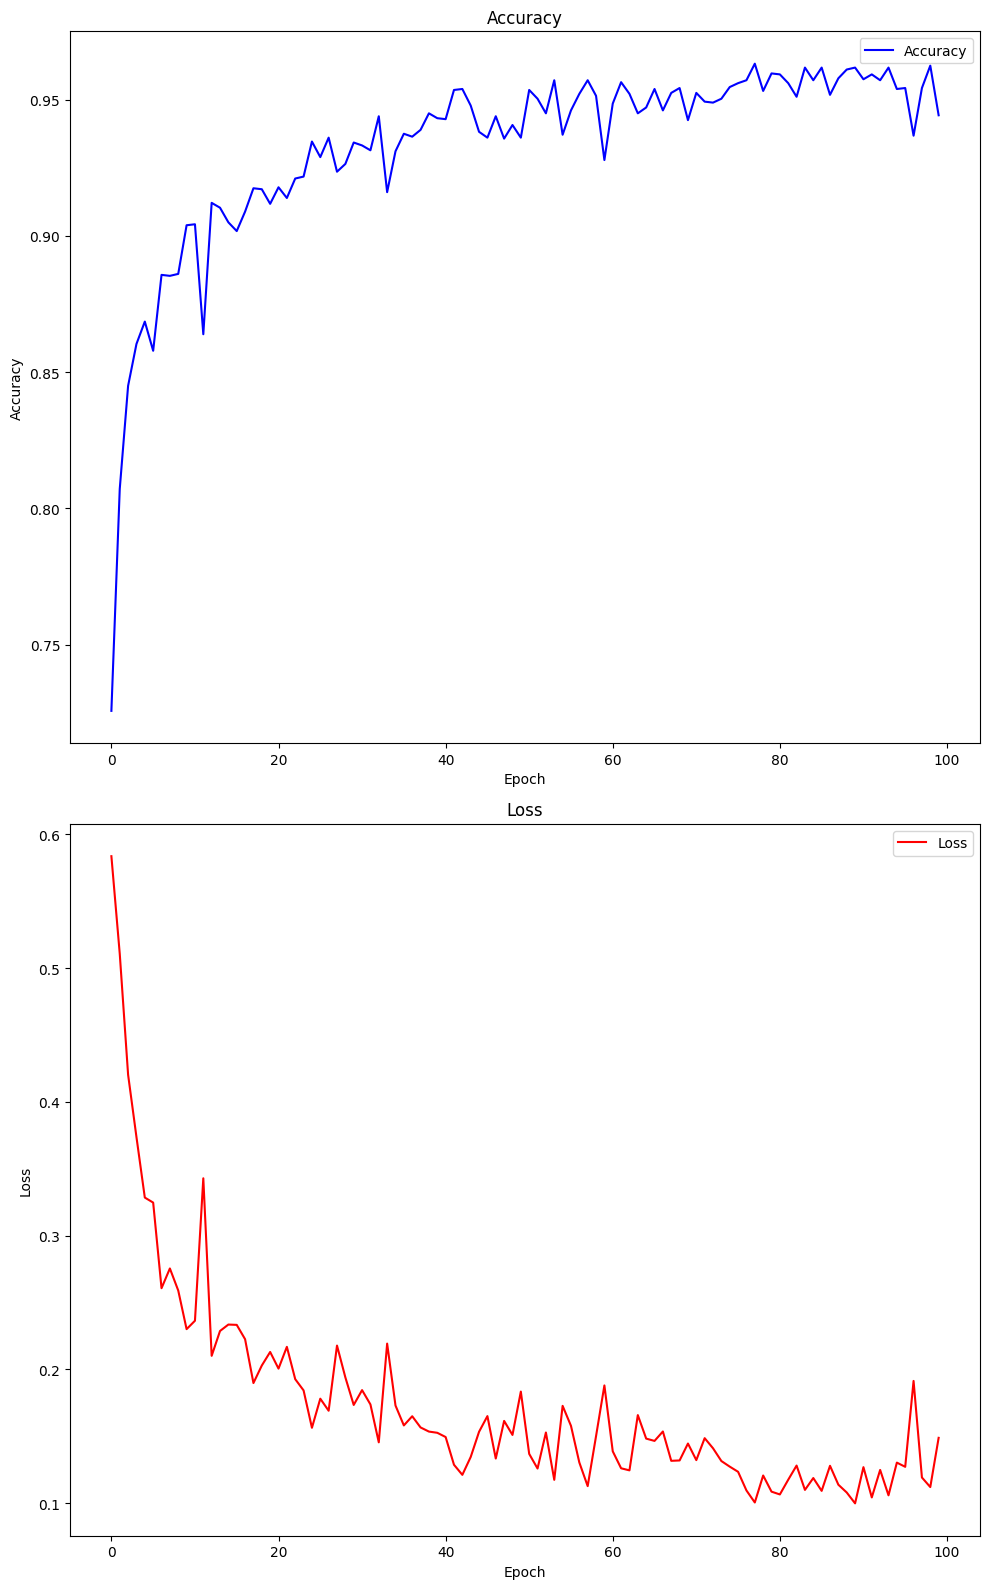

In [11]:
import json

# Load history from a JSON file
with open('history_ViT_Task_2_binary_B128_E100.json', 'r') as file:
    history = json.load(file)

# Now 'history' contains the data loaded from the JSON file
print(history)

import matplotlib.pyplot as plt

accuracy = history['val_accuracy']
loss = history['val_loss']

# Create a figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 16))

# Plot accuracy
ax1.plot(accuracy, label='Accuracy', color='blue')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot loss
ax2.plot(loss, label='Loss', color='red')
ax2.set_title('Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()


{'loss': [0.8575717806816101, 0.687927782535553, 0.6576432585716248, 0.6387841701507568, 0.6209045052528381, 0.6050597429275513, 0.5861225724220276, 0.5746301412582397, 0.5513309836387634, 0.5435426235198975, 0.5263087153434753, 0.5062160491943359, 0.4878385663032532, 0.4726908802986145, 0.4428417682647705, 0.4301871955394745, 0.41230109333992004, 0.39692914485931396, 0.3816593885421753, 0.3626113533973694, 0.35013073682785034, 0.32804736495018005, 0.31179553270339966, 0.30866843461990356, 0.30445486307144165, 0.31060078740119934, 0.28129351139068604, 0.27481189370155334, 0.2739550769329071, 0.24771124124526978, 0.24636292457580566, 0.2358839362859726, 0.2335337996482849, 0.2232343703508377, 0.2255527228116989, 0.22088508307933807, 0.22385816276073456, 0.22424574196338654, 0.20979495346546173, 0.1937190294265747, 0.1840829700231552, 0.17680440843105316, 0.1854752153158188, 0.17218290269374847, 0.162534698843956, 0.16871018707752228, 0.15508519113063812, 0.15564966201782227, 0.154683351

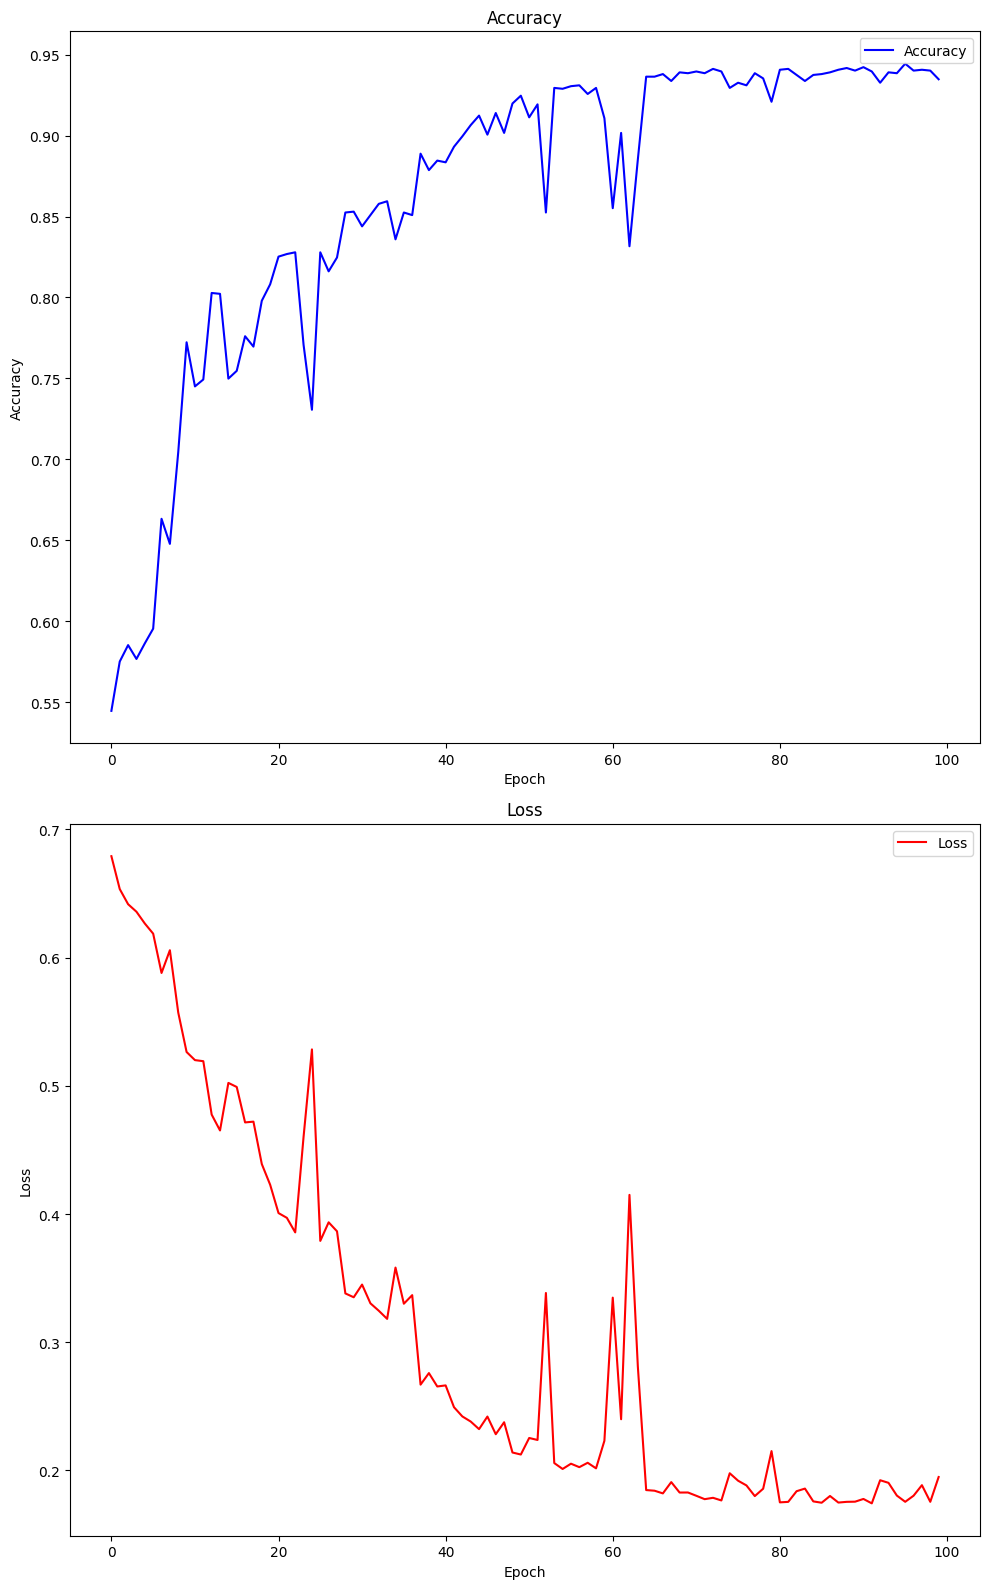

In [8]:
import json

# Load history from a JSON file
with open('history_ResNet_Task_1_B128_E100.json', 'r') as file:
    history = json.load(file)

# Now 'history' contains the data loaded from the JSON file
print(history)

import matplotlib.pyplot as plt

accuracy = history['val_accuracy']
loss = history['val_loss']

# Create a figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 16))

# Plot accuracy
ax1.plot(accuracy, label='Accuracy', color='blue')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot loss
ax2.plot(loss, label='Loss', color='red')
ax2.set_title('Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()